# Regression Modelling for Distillation Column Data

This notebook loads the cleaned dataset, builds regression models to predict ethanol concentration, evaluates performance, and interprets feature importance.

# 1. Load the Cleaned Dataset
Load the cleaned data from the previous EDA notebook.

In [1]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv('cleaned_distillation.csv')
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T13,T14,L,V,D,B,F,Ethanol concentration,TempDiff,mean_Temp
0,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,352.18,...,363.77,371.47,780,1040,260,340,600,0.82076,20.58,354.047143
1,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,352.03,...,362.20,370.98,780,1040,260,340,600,0.83253,20.12,353.786429
2,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,351.91,...,360.16,370.10,780,1040,260,340,600,0.83953,19.25,353.490714
3,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,351.83,...,358.45,368.99,780,1040,260,340,600,0.84366,18.15,353.232143
4,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,351.78,...,357.23,367.81,780,1040,260,340,600,0.84622,16.98,353.020000


# 2. Define Features and Target
Select T1–T14, D, B, F, TempDiff, (optionally mean_Temp) as features. Target is Ethanol concentration.

In [2]:
# Define features and target
tray_cols = [f'T{i}' for i in range(1, 15) if f'T{i}' in df.columns]
feature_cols = tray_cols + ['D', 'B', 'F', 'TempDiff']
if 'mean_Temp' in df.columns:
    feature_cols.append('mean_Temp')
X = df[feature_cols]
y = df['Ethanol concentration']
X.head(), y.head()

(       T1      T2      T3      T4      T5      T6      T7      T8      T9  \
 0  350.89  350.95  351.01  351.08  351.16  351.26  351.38  351.54  351.78   
 1  350.86  350.91  350.96  351.02  351.09  351.17  351.28  351.43  351.66   
 2  350.85  350.89  350.93  350.99  351.05  351.13  351.23  351.37  351.58   
 3  350.84  350.88  350.92  350.97  351.03  351.11  351.21  351.34  351.53   
 4  350.83  350.87  350.91  350.96  351.02  351.09  351.18  351.31  351.49   
 
       T10     T11     T12     T13     T14    D    B    F  TempDiff   mean_Temp  
 0  352.18  353.00  355.19  363.77  371.47  260  340  600     20.58  354.047143  
 1  352.03  352.76  354.66  362.20  370.98  260  340  600     20.12  353.786429  
 2  351.91  352.55  354.13  360.16  370.10  260  340  600     19.25  353.490714  
 3  351.83  352.40  353.75  358.45  368.99  260  340  600     18.15  353.232143  
 4  351.78  352.30  353.50  357.23  367.81  260  340  600     16.98  353.020000  ,
 0    0.82076
 1    0.83253
 2    0.8

# 3. Train/Test Split
Split the data into training and test sets (80/20 split).

In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (2845, 19)
Test shape: (712, 19)


# 4. Train Regression Models
Train Linear Regression, Random Forest, and XGBoost regressors.

In [4]:
# Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f'{name} trained.')

Linear Regression trained.
Random Forest trained.
XGBoost trained.
Random Forest trained.
XGBoost trained.


# 5. Evaluate Models
Evaluate each model using MAE, RMSE, and R² on the test set. Plot predicted vs actual values.

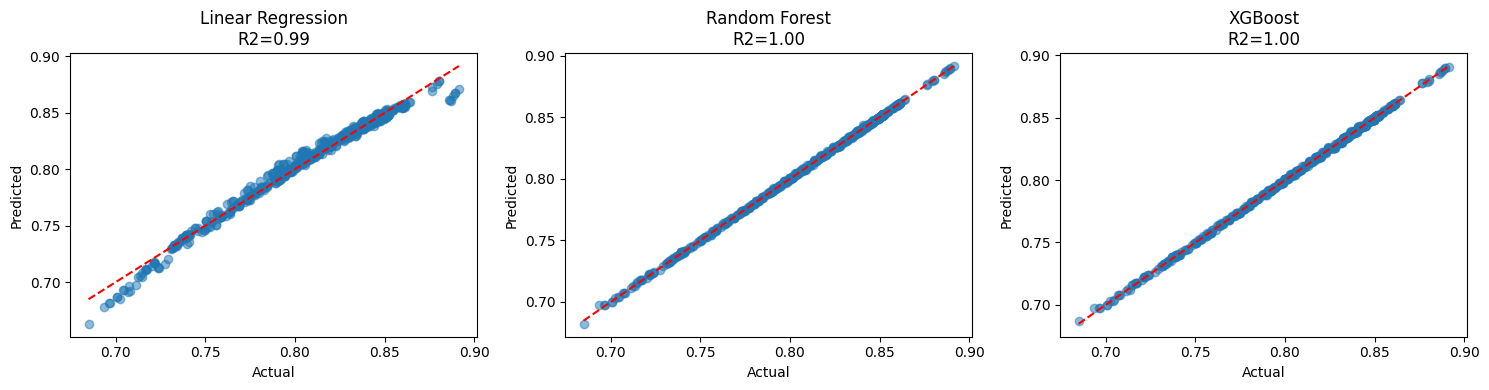

,MAE,RMSE,R2
Linear Regression,0.002880,0.004678,0.987750
Random Forest,0.000324,0.000561,0.999824
XGBoost,0.000508,0.000710,0.999718


In [5]:
# Evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

results = {}
plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}\nR2={r2:.2f}')
plt.tight_layout()
plt.show()

# Show metrics
pd.DataFrame(results).T

# 6. Model Interpretability
Show top 5 most important features using feature importance or SHAP.

In [6]:
import seaborn as sns

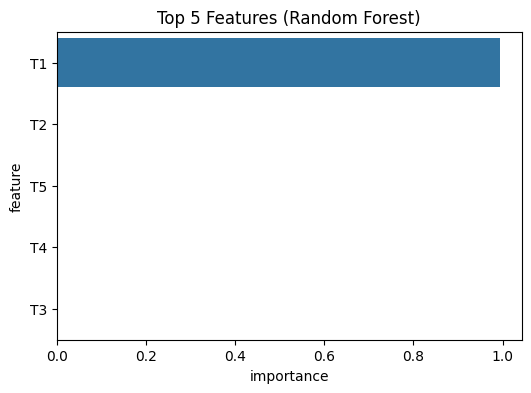

In [9]:
# Feature importance (using Random Forest or XGBoost)
importances = None
best_model_name = max(results, key=lambda k: results[k]['R2'])
if best_model_name in ['Random Forest', 'XGBoost']:
    model = trained_models[best_model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_names = X.columns
        imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
        imp_df = imp_df.sort_values('importance', ascending=False).head(5)
        plt.figure(figsize=(6,4))
        sns.barplot(x='importance', y='feature', data=imp_df)
        plt.title(f'Top 5 Features ({best_model_name})')
        plt.show()
    else:
        print('Model does not support feature_importances_.')
else:
    print('Best model does not support feature importances.')

# 7. Save Best Model
Save the best performing model using joblib.

In [10]:
# Save the best model
import joblib

best_model = trained_models[best_model_name]
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.joblib')
print(f'Best model ({best_model_name}) saved.')

Best model (Random Forest) saved.


# 8. Hybrid Model: Random Forest + PINN
Train a Random Forest for initial prediction, then train a PINN to learn the residuals (errors) between RF predictions and true ethanol concentrations, imposing physics-based constraints during PINN training.

In [11]:
# Import PINN and prepare data for PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from pinn import PINN, pinn_loss

# Prepare data
def to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

X_train_t = to_tensor(X_train)
X_test_t = to_tensor(X_test)
y_train_t = to_tensor(y_train).unsqueeze(1)
y_test_t = to_tensor(y_test).unsqueeze(1)

# Indices for F, D, B columns (needed for PINN loss)
F_idx = X_train.columns.get_loc('F')
D_idx = X_train.columns.get_loc('D')
B_idx = X_train.columns.get_loc('B')

# Get RF predictions and compute residuals
y_train_rf = trained_models['Random Forest'].predict(X_train)
y_test_rf = trained_models['Random Forest'].predict(X_test)
residual_train = y_train.values - y_train_rf
residual_test = y_test.values - y_test_rf
residual_train_t = torch.tensor(residual_train, dtype=torch.float32).unsqueeze(1)
residual_test_t = torch.tensor(residual_test, dtype=torch.float32).unsqueeze(1)

In [12]:
# Train PINN on RF residuals
pinn = PINN(X_train.shape[1])
optimizer = torch.optim.Adam(pinn.parameters(), lr=0.001)

batch_size = 64
dataset = TensorDataset(X_train_t, residual_train_t)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

n_epochs = 100
for epoch in range(n_epochs):
    pinn.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = pinn(xb)
        loss, data_loss, mass_loss, bounds_loss = pinn_loss(preds, yb, xb, F_idx, D_idx, B_idx)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss/len(loader):.4f}")

# Evaluate PINN on test set
pinn.eval()
pred_pinn_resid = pinn(X_test_t).detach().numpy().flatten()
pred_pinn_final = y_test_rf + pred_pinn_resid

Epoch 20/100, Loss: 0.0000
Epoch 40/100, Loss: 0.0000
Epoch 40/100, Loss: 0.0000
Epoch 60/100, Loss: 0.0000
Epoch 60/100, Loss: 0.0000
Epoch 80/100, Loss: 0.0000
Epoch 80/100, Loss: 0.0000
Epoch 100/100, Loss: 0.0000
Epoch 100/100, Loss: 0.0000


Hybrid RF+PINN:   MAE=0.000324, RMSE=0.000561, R2=0.999824


c:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


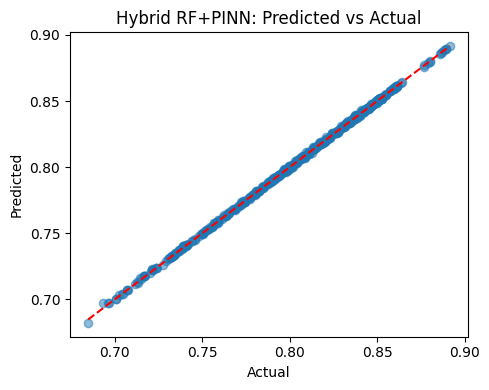

In [14]:
# Compare Hybrid RF+PINN performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_pinn = mean_absolute_error(y_test, pred_pinn_final)
rmse_pinn = mean_squared_error(y_test, pred_pinn_final, squared=False)
r2_pinn = r2_score(y_test, pred_pinn_final)

print('Hybrid RF+PINN:   MAE={:.6f}, RMSE={:.6f}, R2={:.6f}'.format(mae_pinn, rmse_pinn, r2_pinn))

import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(y_test, pred_pinn_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Hybrid RF+PINN: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()